In [1]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.static import players
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Import successfull")

Import successfull


In [4]:
player_name = 'Luka Doncic'
player = players.find_players_by_full_name(player_name)[0]

#game logs
game_log = playergamelog.PlayerGameLog(
    player_id = player['id'],
    season = '2024-25'
)

games_df = game_log.get_data_frames()[0]

print(f"Games played: {len(games_df)}")
print("\nFirst 5 games:")
print(games_df[['Game_ID', 'GAME_DATE', 'MATCHUP', 'PTS', 'REB', 'AST']].head())

Games played: 50

First 5 games:
      Game_ID     GAME_DATE      MATCHUP  PTS  REB  AST
0  0022401185  Apr 11, 2025  LAL vs. HOU   39    8    7
1  0022401159  Apr 09, 2025    LAL @ DAL   45    8    6
2  0022401153  Apr 08, 2025    LAL @ OKC   23    3    5
3  0022401135  Apr 06, 2025    LAL @ OKC   30    7    6
4  0022401126  Apr 04, 2025  LAL vs. NOP   35    6    6


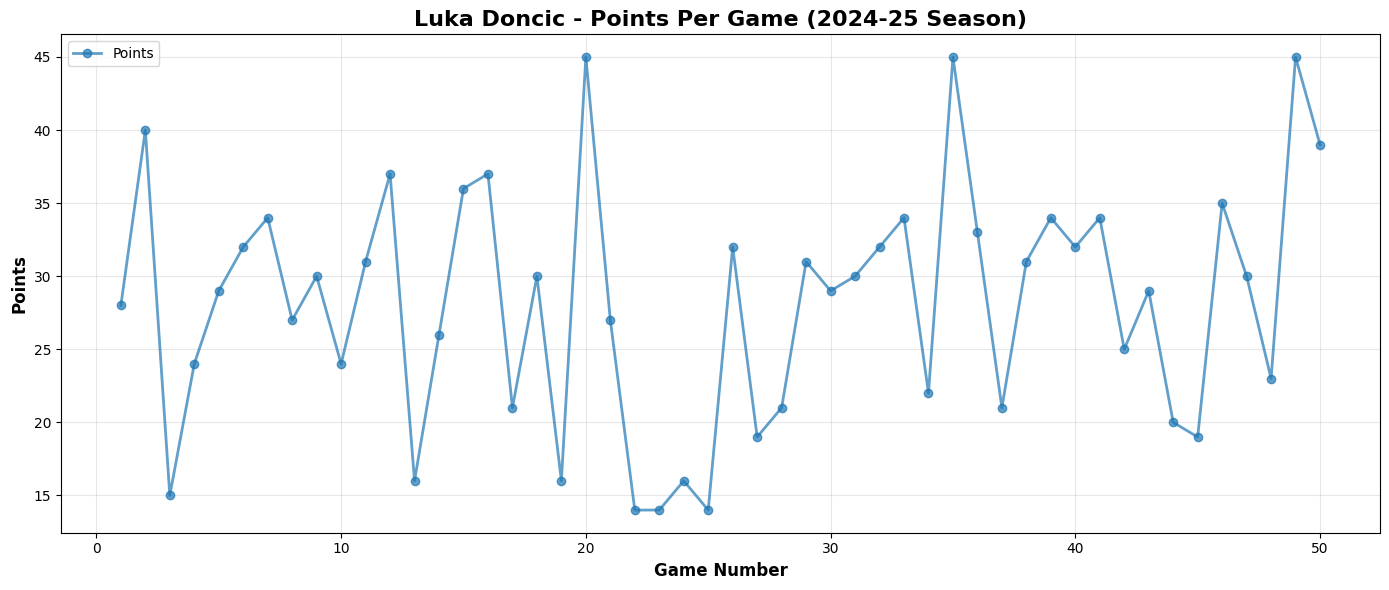


Season average: 28.2 PPG
Highest: 45 points
Lowest: 14 points


In [6]:
# scoring over season
# reverse to make chronological
games_df = games_df.iloc[::-1].reset_index(drop = True)
games_df['GAME_NUM'] = range(1, len(games_df) + 1)

plt.figure(figsize = (14, 6))
plt.plot(games_df['GAME_NUM'], games_df['PTS'], marker = 'o',
         linewidth = 2, markersize = 6, alpha = 0.7, label = 'Points')
plt.xlabel('Game Number', fontsize = 12, fontweight = 'bold')
plt.ylabel('Points', fontsize = 12, fontweight = 'bold')
plt.title(f"{player_name} - Points Per Game (2024-25 Season)",
          fontsize = 16, fontweight = 'bold')
plt.grid(alpha = 0.3)
plt.legend()
plt.tight_layout()
plt.savefig(f'../visualizations/{player_name.replace(" ", "_")}_game_trend.png',
            dpi = 300, bbox_inches = 'tight')
plt.show()

print(f"\nSeason average: {games_df['PTS'].mean():.1f} PPG")
print(f"Highest: {games_df['PTS'].max()} points")
print(f"Lowest: {games_df['PTS'].min()} points")

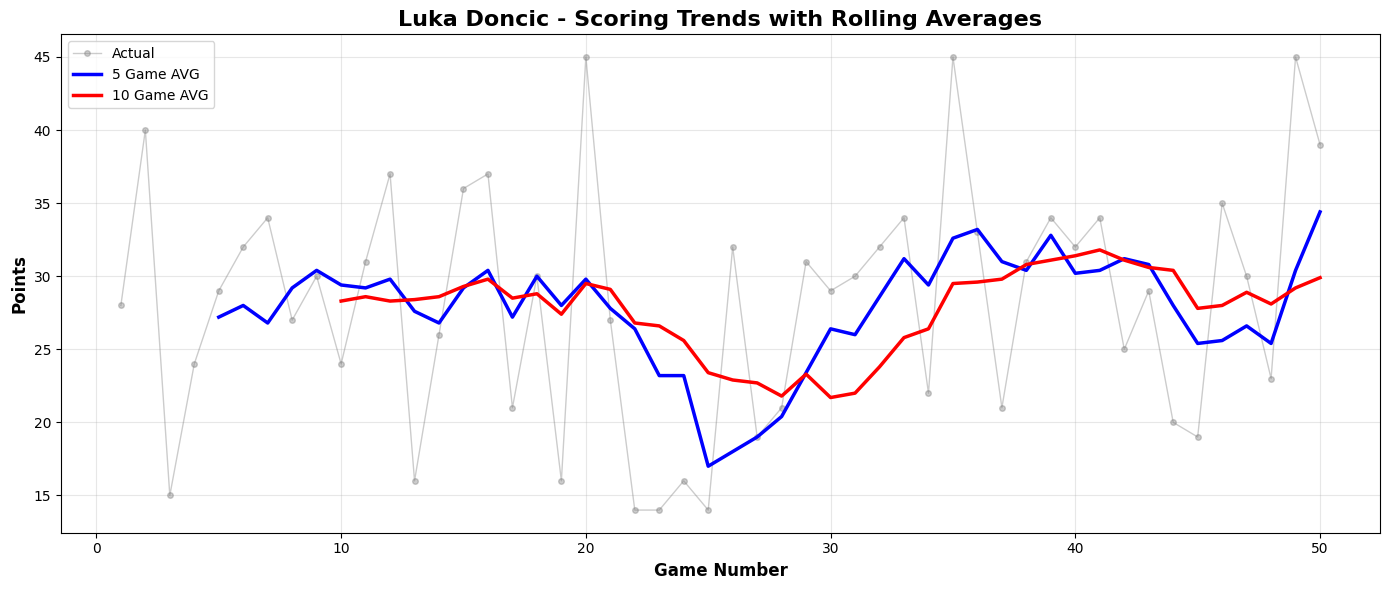

In [7]:
# 5 game rolling avg
games_df['PTS_5G_AVG'] = games_df['PTS'].rolling(window = 5).mean()

# 10 game rolling avg
games_df['PTS_10G_AVG'] = games_df['PTS'].rolling(window = 10).mean()

plt.figure(figsize = (14, 6))
plt.plot(games_df['GAME_NUM'], games_df['PTS'], marker = 'o',
         linewidth = 1, markersize = 4, alpha = 0.4, label = 'Actual', color = 'gray')
plt.plot(games_df['GAME_NUM'], games_df['PTS_5G_AVG'],
         linewidth = 2.5, label = '5 Game AVG', color = 'blue')
plt.plot(games_df['GAME_NUM'], games_df['PTS_10G_AVG'],
         linewidth = 2.5, label = '10 Game AVG', color = 'red')

plt.xlabel('Game Number', fontsize = 12, fontweight = 'bold')
plt.ylabel('Points', fontsize = 12, fontweight = 'bold')
plt.title(f"{player_name} - Scoring Trends with Rolling Averages",
          fontsize = 16, fontweight = 'bold')
plt.grid(alpha = 0.3)
plt.legend()
plt.tight_layout()
plt.savefig(f'../visualizations/{player_name.replace(" ", "_")}_rolling_avg.png',
            dpi = 300, bbox_inches = 'tight')
plt.show()

In [10]:
# hot streak - 3+ consec games above season avg
# cold streak - 3+ consev games below season avg
season_avg = games_df['PTS'].mean()
games_df['ABOVE_AVG'] = games_df['PTS'] > season_avg

# streaks
streaks = []
current_streak = 1
streak_type = games_df['ABOVE_AVG'].iloc[0]

for i in range(1, len(games_df)):
    if games_df['ABOVE_AVG'].iloc[i] == streak_type:
        current_streak += 1
    else:
        if current_streak >= 3:
            streak_label = "Hot" if streak_type else "Cold"
            streaks.append({
                'Type': streak_label,
                'Length': current_streak,
                'End_Game': i
            })
        current_streak = 1
        streak_type = games_df['ABOVE_AVG'].iloc[i]

print(f"\nSeason Average: {season_avg:.1f} PPG")
print(f"\nStreaks (3+ games):")
for streak in streaks:
    print(f"{streak['Type']} streak: {streak['Length']} games (ended game #{streak['End_Game']})")


Season Average: 28.2 PPG

Streaks (3+ games):
Hot streak: 3 games (ended game #7)
Cold streak: 5 games (ended game #25)
Hot streak: 5 games (ended game #33)
Hot streak: 4 games (ended game #41)


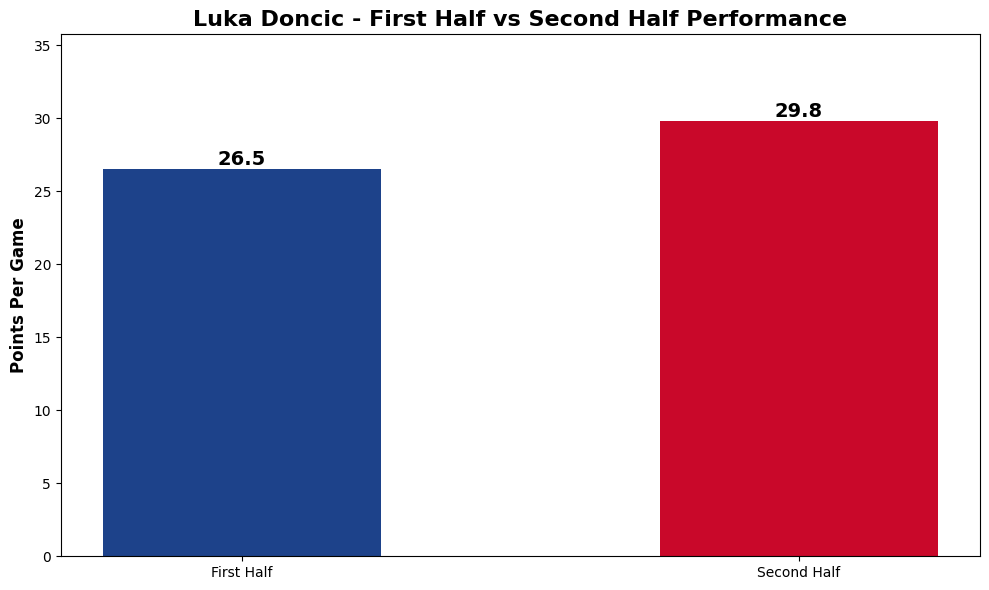


First Half Average: 26.5 PPG
Second Half Average: 29.8 PPG
Difference: 3.3 PPG


In [ ]:
# halves comparison
midpoint = len(games_df) // 2
first_half = games_df.iloc[:midpoint]
second_half = games_df.iloc[midpoint:]

first_half_avg = first_half['PTS'].mean()
second_half_avg = second_half['PTS'].mean()

plt.figure(figsize = (10, 6))
comparison = pd.DataFrame({
    'Period': ['First Half', 'Second Half'],
    'PPG': [first_half_avg, second_half_avg]
})

plt.bar(comparison['Period'], comparison['PPG'], color = ['#1d428a', '#c9082a'], width = 0.5)
plt.ylabel('Points Per Game', fontsize = 12, fontweight = 'bold')
plt.title(f"{player_name} - First Half vs Second Half Performance",
          fontsize = 16, fontweight = 'bold')
plt.ylim(0, max(first_half_avg, second_half_avg) * 1.2)

for i, val in enumerate(comparison['PPG']):
    plt.text(i, val, f'{val:.1f}', ha = 'center', va ='bottom',
             fontsize = 14, fontweight = 'bold')
    
plt.tight_layout()
plt.show()

print(f"\nFirst Half Average: {first_half_avg:.1f} PPG")
print(f"Second Half Average: {second_half_avg:.1f} PPG")
print(f"Difference: {abs(second_half_avg - first_half_avg):.1f} PPG")